<a href="https://colab.research.google.com/github/JAHshrooms/imc2023-A.-Hawker/blob/main/Class5lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

!git clone https://github.com/jcdevaney/imc2023.git

fatal: destination path 'imc2023' already exists and is not an empty directory.


In [ ]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

  # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)
    
    # Create the first subplot
    plt.subplot(2,1,1)
    
    # Plot the time-domain representation of the inputted audio signal  
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Create the second subplot
    plt.subplot(2,1,2)
    
    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

In [ ]:

#filterSignal()
def filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig):
  if filtType == 'high' or filtType == 'low':
    filterFreq = freq / (sr/2)
  elif filtType == 'bandpass' or filtType == 'bandstop':
    filterFreq = [freq[0]/(sr/2),freq[1]/ (sr/2)]

  b, a =sg.butter(order, filterFreq, filtType)
  sigFil =sg.filtfilt(b, a, sig)
  plotTimeFreq(sigFil,sr,'Original Signal', winSize,specType,fig)
  return sigFil

In [ ]:
def allFilters(sig,sr,freq,width,order,winSize,specType):
  sig_lp=filterSignal(sig,sr,freq,'low',order,winSize,specType,1)
  sig_hp=filterSignal(sig,sr,freq,'high',order,winSize,specType,2)
  sig_bp=filterSignal(sig,sr,[freq-width,freq+width],'bandpass',order,winSize,specType,3)
  sig_bs=filterSignal(sig,sr,[freq-width,freq+width],'bandstop',order,winSize,specType,4)
  return sig_lp, sig_hp, sig_bp, sig_bs


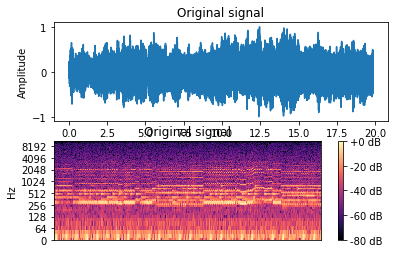

In [ ]:
sig , sr = librosa.load('imc2023/audioFiles/avm2.wav')
winSize = 1024
specType = 'log'
fig = 1
plotTimeFreq(sig,sr,'Original signal',winSize,specType,fig)
IPython.display.Audio(data=sig, rate=sr)

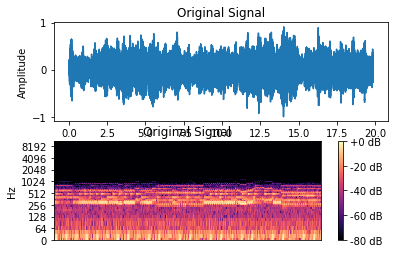

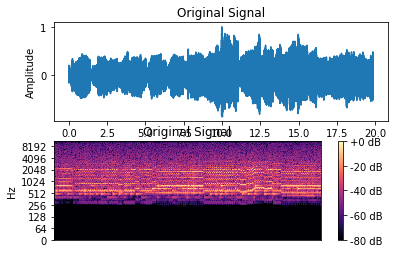

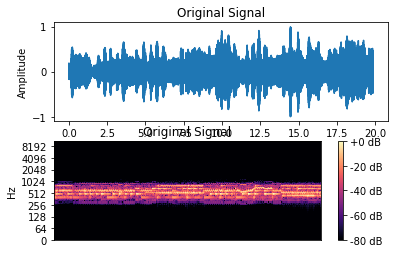

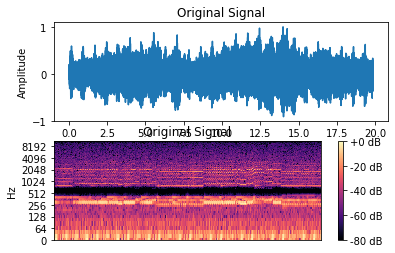

In [ ]:
freq = 600
width = 200
order = 4
#allFilters(sig,sr,freq,width,order,winSize,specType)
sig_lp, sig_hp, sig_bp, sig_bs=allFilters(sig,sr,freq,width,order,winSize,specType)